# Task 2 : Exploratary Data Analysis on Titanic Dataset

> Import Basic Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

> Load Titanic Dataset 

In [2]:
data = pd.read_csv('titanic.csv')
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Explore the Data

> Information of dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


> Statistics Summary

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 2. Cleaning the data 

> Find Missing values in columns

In [5]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
data.isnull().sum() / len(data)*100  # percentage of missing values in a column

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

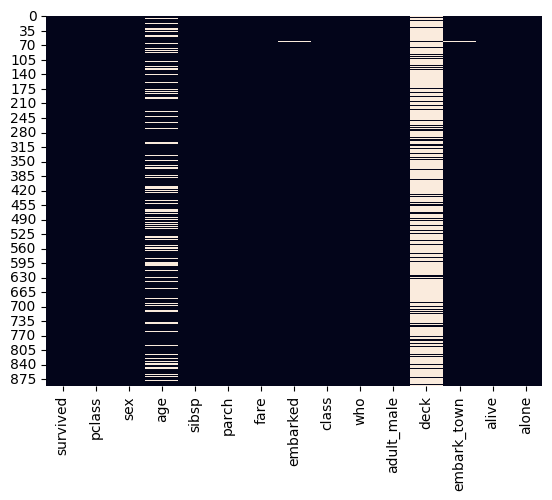

In [7]:
# Check in Heatmap 
sns.heatmap(data.isnull() , cbar= False)

In [8]:
# drop the  column having more than 70% of missing values from dataset 
data.drop("deck", axis=1 , inplace=True)

In [9]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [10]:
# check the Median of the age column
data["age"].median()


np.float64(28.0)

In [11]:
# fiiling missing claues of age column by the mean of age
data["age"].fillna(data["age"].median(),inplace=True)

In [12]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [13]:
#check the Mode of the embarked column 
data["embarked"].mode()[0]

'S'

In [14]:
# check the Mode of the embark_town column
data["embark_town"].mode()[0]

'Southampton'

In [15]:
# fill embark and embarktown with mode
data["embarked"].fillna(data["embarked"].mode()[0],inplace=True)
data["embark_town"].fillna(data["embark_town"].mode()[0],inplace=True)

In [16]:
# Now Reaffirming that there are no missing values
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [17]:
# Now Again check the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [18]:
# Now Again check the Statistics Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 3. Convert types

> Binning
> 

In [19]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [20]:
print(data["age"].max())
print(data["age"].min())

80.0
0.42


<Axes: xlabel='age', ylabel='Count'>

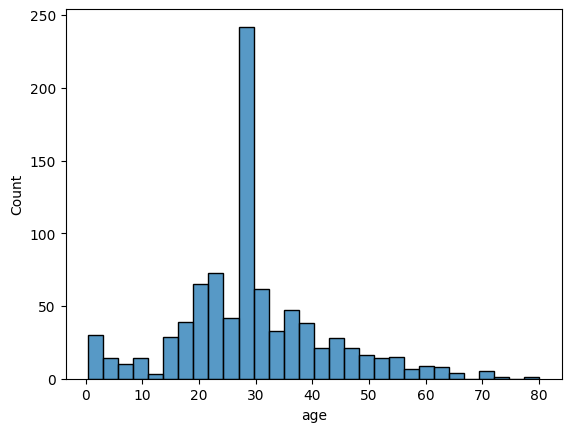

In [21]:
sns.histplot(data["age"])

In [22]:
# binning of age column into categories
bins= [0,2,8,15,22,35,50,80]
labels=["New_born",'Kids','Child',"Teen","Youngers","Elders","Olders"]
# convert the age column in bins


pd.cut(data["age"], bins=bins , labels=labels)

0          Teen
1        Elders
2      Youngers
3      Youngers
4      Youngers
         ...   
886    Youngers
887        Teen
888    Youngers
889    Youngers
890    Youngers
Name: age, Length: 891, dtype: category
Categories (7, object): ['New_born' < 'Kids' < 'Child' < 'Teen' < 'Youngers' < 'Elders' < 'Olders']

> Feature Engineering

In [23]:
bins= [0,2,8,15,22,35,50,80]
labels=["New_born",'Kids','Child',"Teen","Youngers","Elders","Olders"]
# convert the age column in bins
data["binned_age"]=pd.cut(data["age"], bins=bins , labels=labels)

In [24]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Elders
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngers
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Youngers
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Youngers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,Youngers
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,Teen
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,Youngers
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,Youngers


In [25]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'binned_age'],
      dtype='object')

In [26]:
data["binned_age"].value_counts()

binned_age
Youngers    443
Elders      153
Teen        148
Olders       64
Kids         30
Child        29
New_born     24
Name: count, dtype: int64

In [27]:
# renaming the column
data.rename(columns={"binned_age":"age_group"})

data.rename(columns={'binned_age': 'age_groups'}, inplace=True)

In [28]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Elders
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngers
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Youngers
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Youngers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,Youngers
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,Teen
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,Youngers
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,Youngers


## 4. Generate Group based Insight

In [29]:
# generate Group Based Insights

# how many people survived based on class and gender
data.groupby(["class","sex"])["survived"].mean().reset_index()


,class,sex,survived
0,First,female,0.968085
1,First,male,0.368852
2,Second,female,0.921053
3,Second,male,0.157407
4,Third,female,0.500000
5,Third,male,0.135447


In [30]:
# how many people survived based on age groups Check in percentage
data.groupby("age_groups")["survived"].mean()*100

age_groups
New_born    62.500000
Kids        70.000000
Child       44.827586
Teen        33.108108
Youngers    36.343115
Elders      39.869281
Olders      34.375000
Name: survived, dtype: float64

In [34]:
# Survival Rate by Class
data.groupby('class')['survived'].count()

class
First     216
Second    184
Third     491
Name: survived, dtype: int64

In [32]:
# fare by port of embarkat
data.groupby('embark_town')['fare'].mean()

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.243651
Name: fare, dtype: float64

## 5. Data Visualization

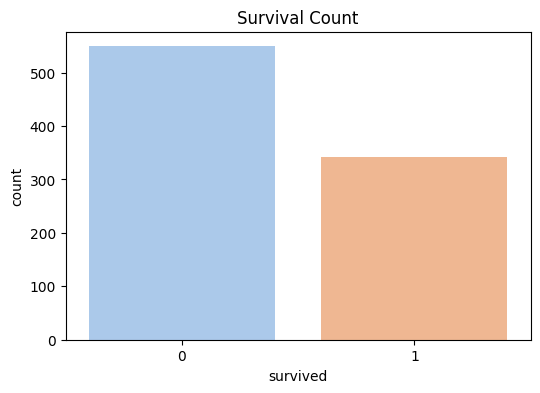

In [39]:
# Survival Count
plt.figure(figsize=(6,4))
sns.countplot(data, x='survived', palette='pastel')
plt.title('Survival Count')
plt.show()

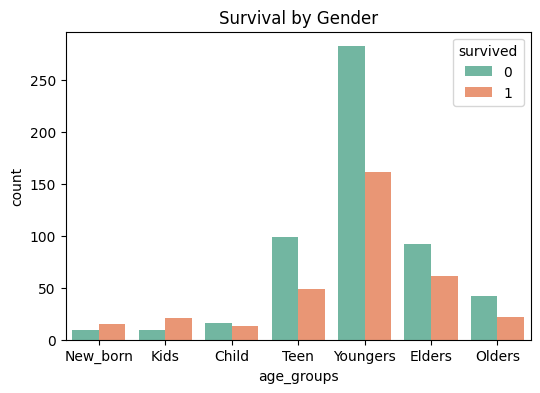

In [44]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data, x="age_groups", hue='survived', palette='Set2')
plt.title('Survival by Gender')
plt.show()

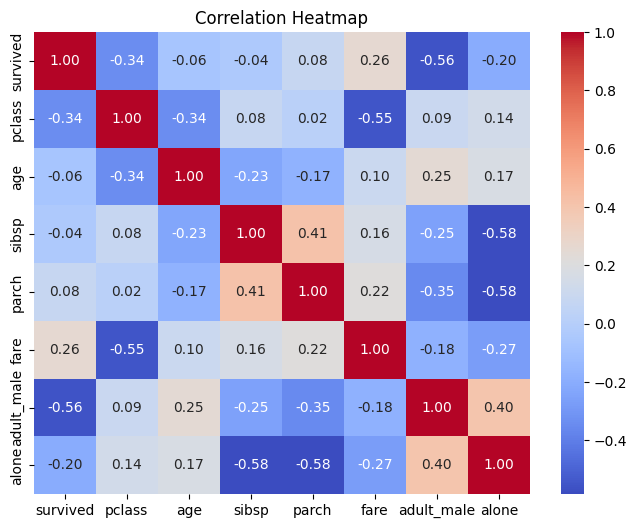

In [35]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

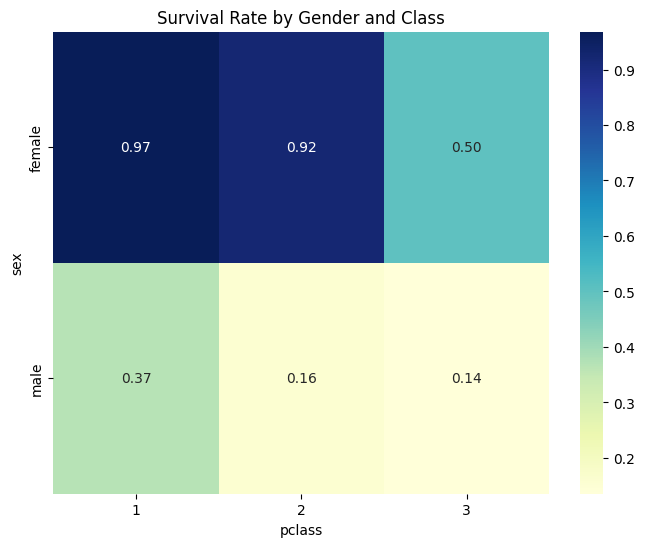

In [38]:
# Survival Rate by Gender and Class
plt.figure(figsize=(8,6))
heatmap_data = data.pivot_table(index='sex', columns='pclass', values='survived')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Rate by Gender and Class')
plt.show()

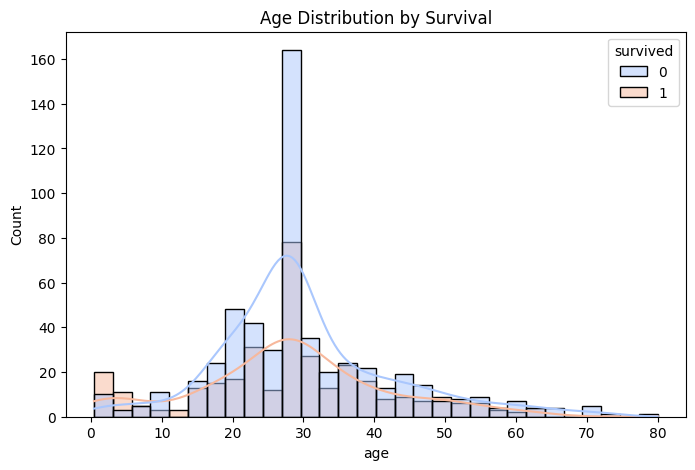

In [48]:
# Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data, x='age', hue='survived', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.show()